<a href="https://colab.research.google.com/github/DataScience202/ML_Project/blob/main/Chart_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [116]:
# Define the paths to your image and csv folders
train_val_dir = "/content/drive/MyDrive/charts/charts/train_val"
test_dir = "/content/drive/MyDrive/charts/charts/test"
train_path_labels = "/content/drive/MyDrive/charts/charts/train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)
train_val_labels = pd.read_csv(train_path_labels)
images = []
labels = []
for filename in os.listdir(train_val_dir):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)

In [117]:
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

In [118]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [119]:
x_train.shape

(1009, 128, 128, 3)

In [124]:

x_train[:5]
y_train[:5]


array([26, 24, 23, 15, 19])

In [125]:
images = []
labels = []
for filename in os.listdir(test_dir):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)

In [126]:
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [127]:
x_test.shape




(50, 128, 128, 3)

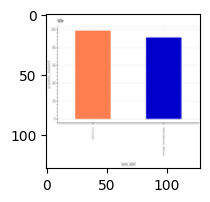

In [128]:
# Check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])


In [129]:
# Define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']

In [130]:
# Map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

In [131]:
y_train
y_train.shape
y_test.shape


(50,)

In [133]:
def image_sample(x, y, index):
 plt.figure(figsize = (10,2))
 plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
 plt.xlabel(image_classes[y[index]])


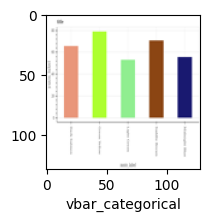

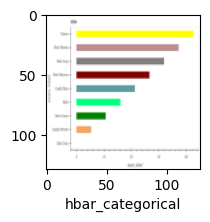

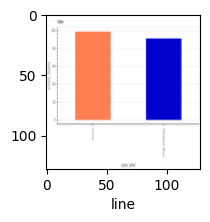

In [134]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [135]:
# Normalize pixel values to [0, 1]
x_train = x_train / 255
x_test = x_test / 255

x_test.shape


(50, 128, 128, 3)

In [136]:
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [137]:
y_train_type[:5]


0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [141]:
x_train = x_train[:1000]
y_train = y_train[:1000]



In [142]:
# Define the model architecture
model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])

In [143]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 49152)             0         
                                                                 
 dense_21 (Dense)            (None, 3000)              147459000 
                                                                 
 dense_22 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_23 (Dense)            (None, 5)                 5005      
                                                                 
Total params: 150,465,005
Trainable params: 150,465,005
Non-trainable params: 0
_________________________________________________________________


In [144]:
# Train the model
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
32/32 [==============================] - 88s 3s/step - loss: 96.1640 - accuracy: 0.1950
Epoch 2/10
32/32 [==============================] - 86s 3s/step - loss: 6.5725 - accuracy: 0.2320
Epoch 3/10
32/32 [==============================] - 87s 3s/step - loss: 1.5859 - accuracy: 0.3820
Epoch 4/10
32/32 [==============================] - 85s 3s/step - loss: 1.2915 - accuracy: 0.4600
Epoch 5/10
32/32 [==============================] - 83s 3s/step - loss: 1.3941 - accuracy: 0.4210
Epoch 6/10
32/32 [==============================] - 84s 3s/step - loss: 1.3392 - accuracy: 0.4360
Epoch 7/10
32/32 [==============================] - 87s 3s/step - loss: 1.2296 - accuracy: 0.4690
Epoch 8/10
32/32 [==============================] - 88s 3s/step - loss: 1.1921 - accuracy: 0.5080
Epoch 9/10
32/32 [==============================] - 85s 3s/step - loss: 1.2213 - accuracy: 0.4970
Epoch 10/10
32/32 [==============================] - 85s 3s/step - loss: 1.2001 - accuracy: 0.4730


In [147]:

# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



In [148]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 2s 243ms/step - loss: 1.2839 - accuracy: 0.3750


[1.283949613571167, 0.375]

In [149]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]


7/7 [==============================] - 2s 247ms/step


In [150]:
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)


Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 1.6270 - accuracy: 0.2025 - val_loss: 2.7217 - val_accuracy: 0.1650
Epoch 2/50
1/1 [==============================] - 14s 14s/step - loss: 2.4643 - accuracy: 0.2087 - val_loss: 1.8164 - val_accuracy: 0.2300
Epoch 3/50
1/1 [==============================] - 15s 15s/step - loss: 1.7620 - accuracy: 0.2087 - val_loss: 1.6334 - val_accuracy: 0.1900
Epoch 4/50
1/1 [==============================] - 15s 15s/step - loss: 1.6610 - accuracy: 0.2025 - val_loss: 1.5967 - val_accuracy: 0.3500
Epoch 5/50
1/1 [==============================] - 14s 14s/step - loss: 1.6244 - accuracy: 0.3413 - val_loss: 1.5652 - val_accuracy: 0.2650
Epoch 6/50
1/1 [==============================] - 14s 14s/step - loss: 1.5865 - accuracy: 0.2338 - val_loss: 1.5452 - val_accuracy: 0.2650
Epoch 7/50
1/1 [==============================] - 17s 17s/step - loss: 1.5530 - accuracy: 0.2250 - val_loss: 1.5298 - val_accuracy: 0.3000
Epoch 8/50
1/1 [===========

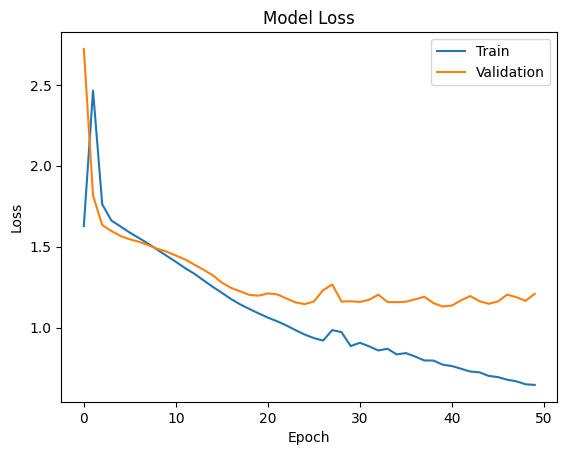

In [151]:
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [152]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 109ms/step - loss: 1.2087 - accuracy: 0.5700


[1.2087032794952393, 0.5699999928474426]

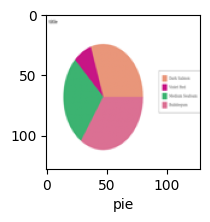

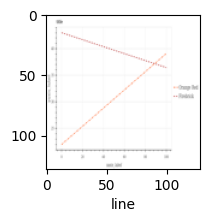

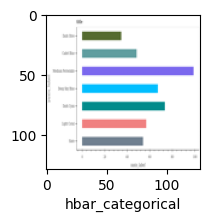

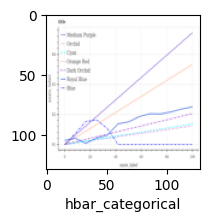

In [153]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [156]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]



7/7 [==============================] - 1s 108ms/step


array([[6.4382541e-01, 1.0767850e-01, 1.8340442e-01, 1.4339020e-02,
        5.0752591e-02],
       [1.0054404e-01, 8.4770907e-04, 5.2597397e-03, 1.5304518e-03,
        8.9181805e-01],
       [4.6289051e-03, 2.8465427e-05, 8.2058061e-05, 2.9493414e-05,
        9.9523103e-01],
       [4.3754953e-01, 3.8844180e-05, 2.1316293e-03, 2.0836882e-04,
        5.6007153e-01],
       [6.4314330e-01, 1.2729296e-01, 1.5778694e-01, 1.1761581e-02,
        6.0015216e-02]], dtype=float32)

In [157]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[0, 4, 4, 4, 0]

In [158]:
y_test[:5]

array([0, 4, 4, 4, 0])

'pie'

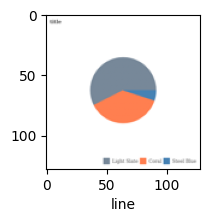

In [161]:
image_sample(x_test,y_test,20) #actual
image_classes[y_classes[20]] #predicted

In [162]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.42      0.68      0.52        37
           1       0.88      0.52      0.66        44
           2       0.69      0.46      0.55        48
           3       0.43      0.55      0.48        33
           4       0.65      0.68      0.67        38

    accuracy                           0.57       200
   macro avg       0.61      0.58      0.57       200
weighted avg       0.63      0.57      0.58       200



In [164]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 1s 0us/step


In [165]:
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)


In [166]:
for layer in pt_model.layers:
 layer.trainable = False


In [167]:
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [168]:
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [172]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Dropout, Flatten

In [173]:
# Create AlexNet model
model = Sequential()


In [174]:
# Layer 1: Convolutional Layer with ReLU activation, and max pooling
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(ZeroPadding2D((2,2)))

In [175]:
# Layer 2: Convolutional Layer with ReLU activation, and max pooling
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))

# Layer 3: Convolutional Layer with ReLU activation
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(ZeroPadding2D((1,1)))

# Layer 4: Convolutional Layer with ReLU activation
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(ZeroPadding2D((1,1)))

# Layer 5: Convolutional Layer with ReLU activation, and max pooling
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))

# Layer 6: Flatten layer
model.add(Flatten())

# Layer 7: Fully Connected Layer with ReLU activation
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 8: Fully Connected Layer with ReLU activation
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 9: Output layer with softmax activation
model.add(Dense(1000, activation='softmax'))

In [176]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [191]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Dropout, Flatten



In [192]:
# Create AlexNet model
model = Sequential()

# Layer 1: Convolutional Layer with ReLU activation, and max pooling
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(ZeroPadding2D((2,2)))

# Layer 2: Convolutional Layer with ReLU activation, and max pooling
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))

# Layer 3: Convolutional Layer with ReLU activation
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(ZeroPadding2D((1,1)))

# Layer 4: Convolutional Layer with ReLU activation
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(ZeroPadding2D((1,1)))

# Layer 5: Convolutional Layer with ReLU activation, and max pooling
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))

# Layer 6: Flatten layer
model.add(Flatten())

# Layer 7: Fully Connected Layer with ReLU activation
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 8: Fully Connected Layer with ReLU activation
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 9: Output layer with softmax activation
model.add(Dense(1000, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])